In [2]:
import sys
import os
import re

from pathlib import Path

In [3]:
# need to be able to import src
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# absolute path to the src directory
src_path = os.path.abspath("../src")

# Add src directory to system path
sys.path.append(src_path)

# get the /MLCBAss1/Assignment-1 path
ass_path=sys.path[-2]

print(ass_path)

f:\Vital Stuff\Εργασίες Σχολείου\The dreadful present\Μαστερ\Μαστερ Εξάμηνο 2ο\Machine Learning in Computational Biology\Project\FinalProject\MLKinCompBioFinalProject


In [4]:
%load_ext autoreload
%autoreload 2

from functions import *

In [8]:
X_df=produce_df(hy_path="../data/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HY-log2_subset_3k_cells.h5ad",
                    th_path="../data/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-TH-log2_subset_3k_cells.h5ad",
                    verbose=False)

my_file = Path("../data/merged_train_subset3k.csv")

if not my_file.is_file():
    X_df.to_csv("../data/merged_train_subset3k.csv",index=False)


Index(['ENSMUSG00000025902', 'ENSMUSG00000104238', 'ENSMUSG00000067879',
       'ENSMUSG00000097893', 'ENSMUSG00000048960', 'ENSMUSG00000099498',
       'ENSMUSG00000025932', 'ENSMUSG00000025927', 'ENSMUSG00000028033',
       'ENSMUSG00000026141',
       ...
       'ENSMUSG00000040522', 'ENSMUSG00000044583', 'ENSMUSG00000031355',
       'ENSMUSG00000072844', 'ENSMUSG00000069053', 'ENSMUSG00000096650',
       'ENSMUSG00000099601', 'ENSMUSG00000101399', 'ENSMUSG00000102111',
       'ENSMUSG00000102045'],
      dtype='object', name='gene_identifier', length=2000)


In [9]:

my_file = Path("../data/rncv_summary_results.csv")
if not my_file.is_file():
    perform_rnCV(path='../data/merged_train_subset3k.csv')

The winner method is LightGBM with 9/9 metrics
 ALL HAIL THE KING!


<Axes: title={'center': 'Repeated nested CV metrics for 3k cell and top 2k genes'}, xlabel='Model'>

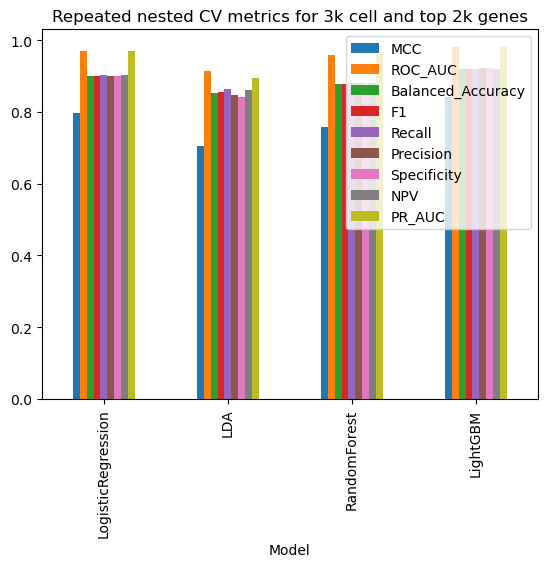

In [16]:
if my_file.is_file():
    results_df=pd.read_csv("../data/rncv_summary_results.csv")

results_df=replace_column(df=results_df,to_be_replaced='Unnamed: 0',to_be_added='Model')

results_df.to_csv("../data/rncv_summary_results.csv",index=False)

if my_file.is_file():
    results_df=pd.read_csv("../data/rncv_summary_results.csv")


winner=get_winner(summary=results_df)

print(f"The winner method is {winner[0]} with {winner[1]}/{results_df.shape[1]-1} metrics\n ALL HAIL THE KING!")

results_df.plot(x='Model',kind='bar',stacked=False,title='Repeated nested CV metrics for 3k cell and top 2k genes')